In [77]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv") 

data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [78]:
# unbalanced dataset
print(data.groupby('TARGET').size())

TARGET
0    73012
1     3008
dtype: int64


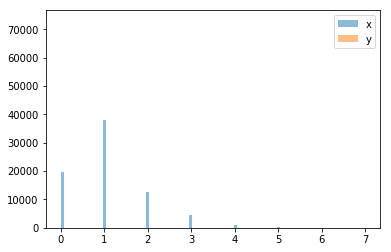

In [95]:


plt.hist(data.num_var4, bins=100, alpha=0.5, label='x')
plt.hist(data.TARGET, bins=100, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

In [ ]:
train.num_var4.hist(bins=100)

plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.title('Most customers have 1 product with the bank')
plt.show()

In [79]:
# descriptions
print(data.describe())

data = data.replace(-999999,2)

                  ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 

In [80]:
count_uniques = data.apply(lambda x: len(x.unique()))
constants = count_uniques[count_uniques == 1].index.tolist()
len(constants)

34

In [81]:
const = data[constants]
print(const.describe())

data = data.drop(constants, axis=1)

       ind_var2_0  ind_var2  ind_var27_0  ind_var28_0  ind_var28  ind_var27  \
count     76020.0   76020.0      76020.0      76020.0    76020.0    76020.0   
mean          0.0       0.0          0.0          0.0        0.0        0.0   
std           0.0       0.0          0.0          0.0        0.0        0.0   
min           0.0       0.0          0.0          0.0        0.0        0.0   
25%           0.0       0.0          0.0          0.0        0.0        0.0   
50%           0.0       0.0          0.0          0.0        0.0        0.0   
75%           0.0       0.0          0.0          0.0        0.0        0.0   
max           0.0       0.0          0.0          0.0        0.0        0.0   

       ind_var41  ind_var46_0  ind_var46  num_var27_0  \
count    76020.0      76020.0    76020.0      76020.0   
mean         0.0          0.0        0.0          0.0   
std          0.0          0.0        0.0          0.0   
min          0.0          0.0        0.0          0.0   
25%

In [82]:
from itertools import combinations


features_to_compare = list(combinations(data.columns.tolist(),2))
equal_features = []
for compare in features_to_compare:
    is_equal = np.array_equal(data[compare[0]],data[compare[1]])
    if is_equal:
        equal_features.append(list(compare))

equal_features

[['ind_var6_0', 'ind_var29_0'],
 ['ind_var6', 'ind_var29'],
 ['ind_var13_medio_0', 'ind_var13_medio'],
 ['ind_var18_0', 'ind_var18'],
 ['ind_var26_0', 'ind_var26'],
 ['ind_var25_0', 'ind_var25'],
 ['ind_var32_0', 'ind_var32'],
 ['ind_var34_0', 'ind_var34'],
 ['ind_var37_0', 'ind_var37'],
 ['ind_var40', 'ind_var39'],
 ['num_var6_0', 'num_var29_0'],
 ['num_var6', 'num_var29'],
 ['num_var13_medio_0', 'num_var13_medio'],
 ['num_var18_0', 'num_var18'],
 ['num_var26_0', 'num_var26'],
 ['num_var25_0', 'num_var25'],
 ['num_var32_0', 'num_var32'],
 ['num_var34_0', 'num_var34'],
 ['num_var37_0', 'num_var37'],
 ['num_var40', 'num_var39'],
 ['saldo_var6', 'saldo_var29'],
 ['saldo_var13_medio', 'saldo_medio_var13_medio_ult1'],
 ['delta_imp_reemb_var13_1y3', 'delta_num_reemb_var13_1y3'],
 ['delta_imp_reemb_var17_1y3', 'delta_num_reemb_var17_1y3'],
 ['delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3'],
 ['delta_imp_trasp_var17_in_1y3', 'delta_num_trasp_var17_in_1y3'],
 ['delta_imp_trasp_var17_o

In [83]:
equal_drop = [item[0] for item in equal_features]
data = data.drop(equal_drop, axis=1)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [84]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
51118,102036,2,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75829.650000,0
28008,56042,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72206.310000,0
27102,54250,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
36019,72003,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5972,11985,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70575.120000,0


In [85]:
one_only = data.loc[data['TARGET'] == 1]
zero_only = data.loc[data['TARGET'] == 0]

train = pd.concat([one_only.iloc[:2000],zero_only.iloc[:2000]])
train = shuffle(train)

test = pd.concat([one_only.iloc[2000:],zero_only.iloc[2000:]])
test = shuffle(test)

#validate = pd.concat([one_only.iloc[2000:],zero_only.iloc[3800:]])

train.shape, test.shape

((4000, 308), (72020, 308))

In [86]:
train_y = train['TARGET']
train_X = train.drop(['ID', 'TARGET'], axis=1)
#validation_y = test['TARGET']
#validation_X = test.drop(['ID', 'TARGET'], axis=1)
test_y = test['TARGET']
test_X = test.drop(['ID', 'TARGET'], axis=1)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, confusion_matrix, classification_report, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import timeit

classifiers = [KNeighborsClassifier(11),
               LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               GradientBoostingClassifier(),
               GaussianNB()]

results = []
names = []

for clf in classifiers:
    start = timeit.default_timer()
    clf.fit(train_X, train_y)
    
    cv_results = cross_val_score(clf, train_X, train_y, cv=10, scoring="precision")
    
    name = clf.__class__.__name__
    
    results.append(cv_results)
    names.append(name)
    
    print("="*30)
    print(name)

    train_predictions = clf.predict(test_X)
    acc = accuracy_score(test_y, train_predictions)
    print("Accuracy: {:.2%}".format(acc))

    pre = precision_score(test_y, train_predictions)
    print("Precision: {:.2%}\nPrecision from cross val: {:.2%}".format(pre, cv_results.mean()))
    
    
    print("Roc AUC:", roc_auc_score(test_y, clf.predict_proba(test_X)[:,1],average='macro'))
    fpr, tpr, thresholds = roc_curve(test_y, train_predictions)
    plt.plot(fpr, tpr, label=name)

    stop = timeit.default_timer()
    print("Time: {:.4}s".format(stop-start))
    
 
print("="*30)
print()

KNeighborsClassifier
Accuracy: 59.37%
Precision: 2.06%
Precision from cross val: 60.82%
Roc AUC: 0.6478709249006874
Time: 6.193s
LogisticRegression
Accuracy: 45.81%
Precision: 2.15%
Precision from cross val: 64.05%
Roc AUC: 0.7289483378172614
Time: 2.273s
DecisionTreeClassifier
Accuracy: 64.91%
Precision: 2.70%
Precision from cross val: 67.13%
Roc AUC: 0.6746112704291427
Time: 0.5085s
RandomForestClassifier
Accuracy: 75.58%
Precision: 3.77%
Precision from cross val: 74.41%
Roc AUC: 0.7852192528492836
Time: 1.088s
GradientBoostingClassifier
Accuracy: 74.83%
Precision: 4.18%
Precision from cross val: 75.36%
Roc AUC: 0.8380850662731718
Time: 5.852s
GaussianNB
Accuracy: 9.57%
Precision: 1.51%
Precision from cross val: 51.74%
Roc AUC: 0.7347376985915189
Time: 0.3425s



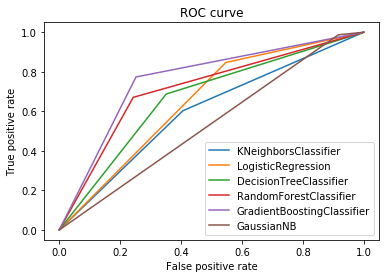

In [32]:
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()          

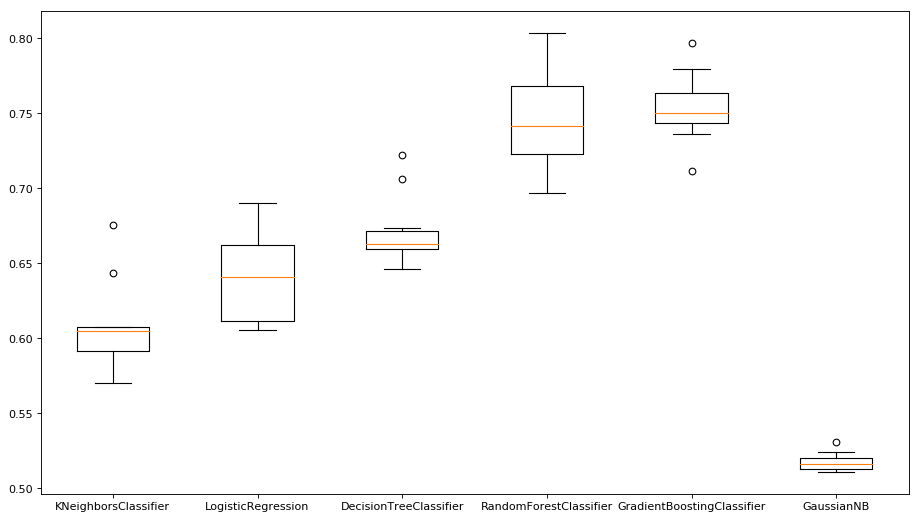

In [33]:
fig=plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
gbc = GradientBoostingClassifier()
gbc.fit(train_X, train_y)
predictions = gbc.predict(test_X)
print(accuracy_score(test_y, predictions))
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))

0.7481949458483754
[[53105 17907]
 [  228   780]]
             precision    recall  f1-score   support

          0       1.00      0.75      0.85     71012
          1       0.04      0.77      0.08      1008

avg / total       0.98      0.75      0.84     72020



In [36]:
importances = pd.DataFrame({'feature':train_X.columns,'importance':np.round(gbc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).reset_index()

In [69]:
importances = importances[:3]
features = importances.feature
features

0          var15
1          var38
2    saldo_var30
Name: feature, dtype: object

In [76]:
train_X = train_X[features]
train_X = train_X.iloc[:200]
train_y = train_y.iloc[:200]
train_X.shape

(200, 3)

In [71]:
dtree = DecisionTreeClassifier()
dtree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

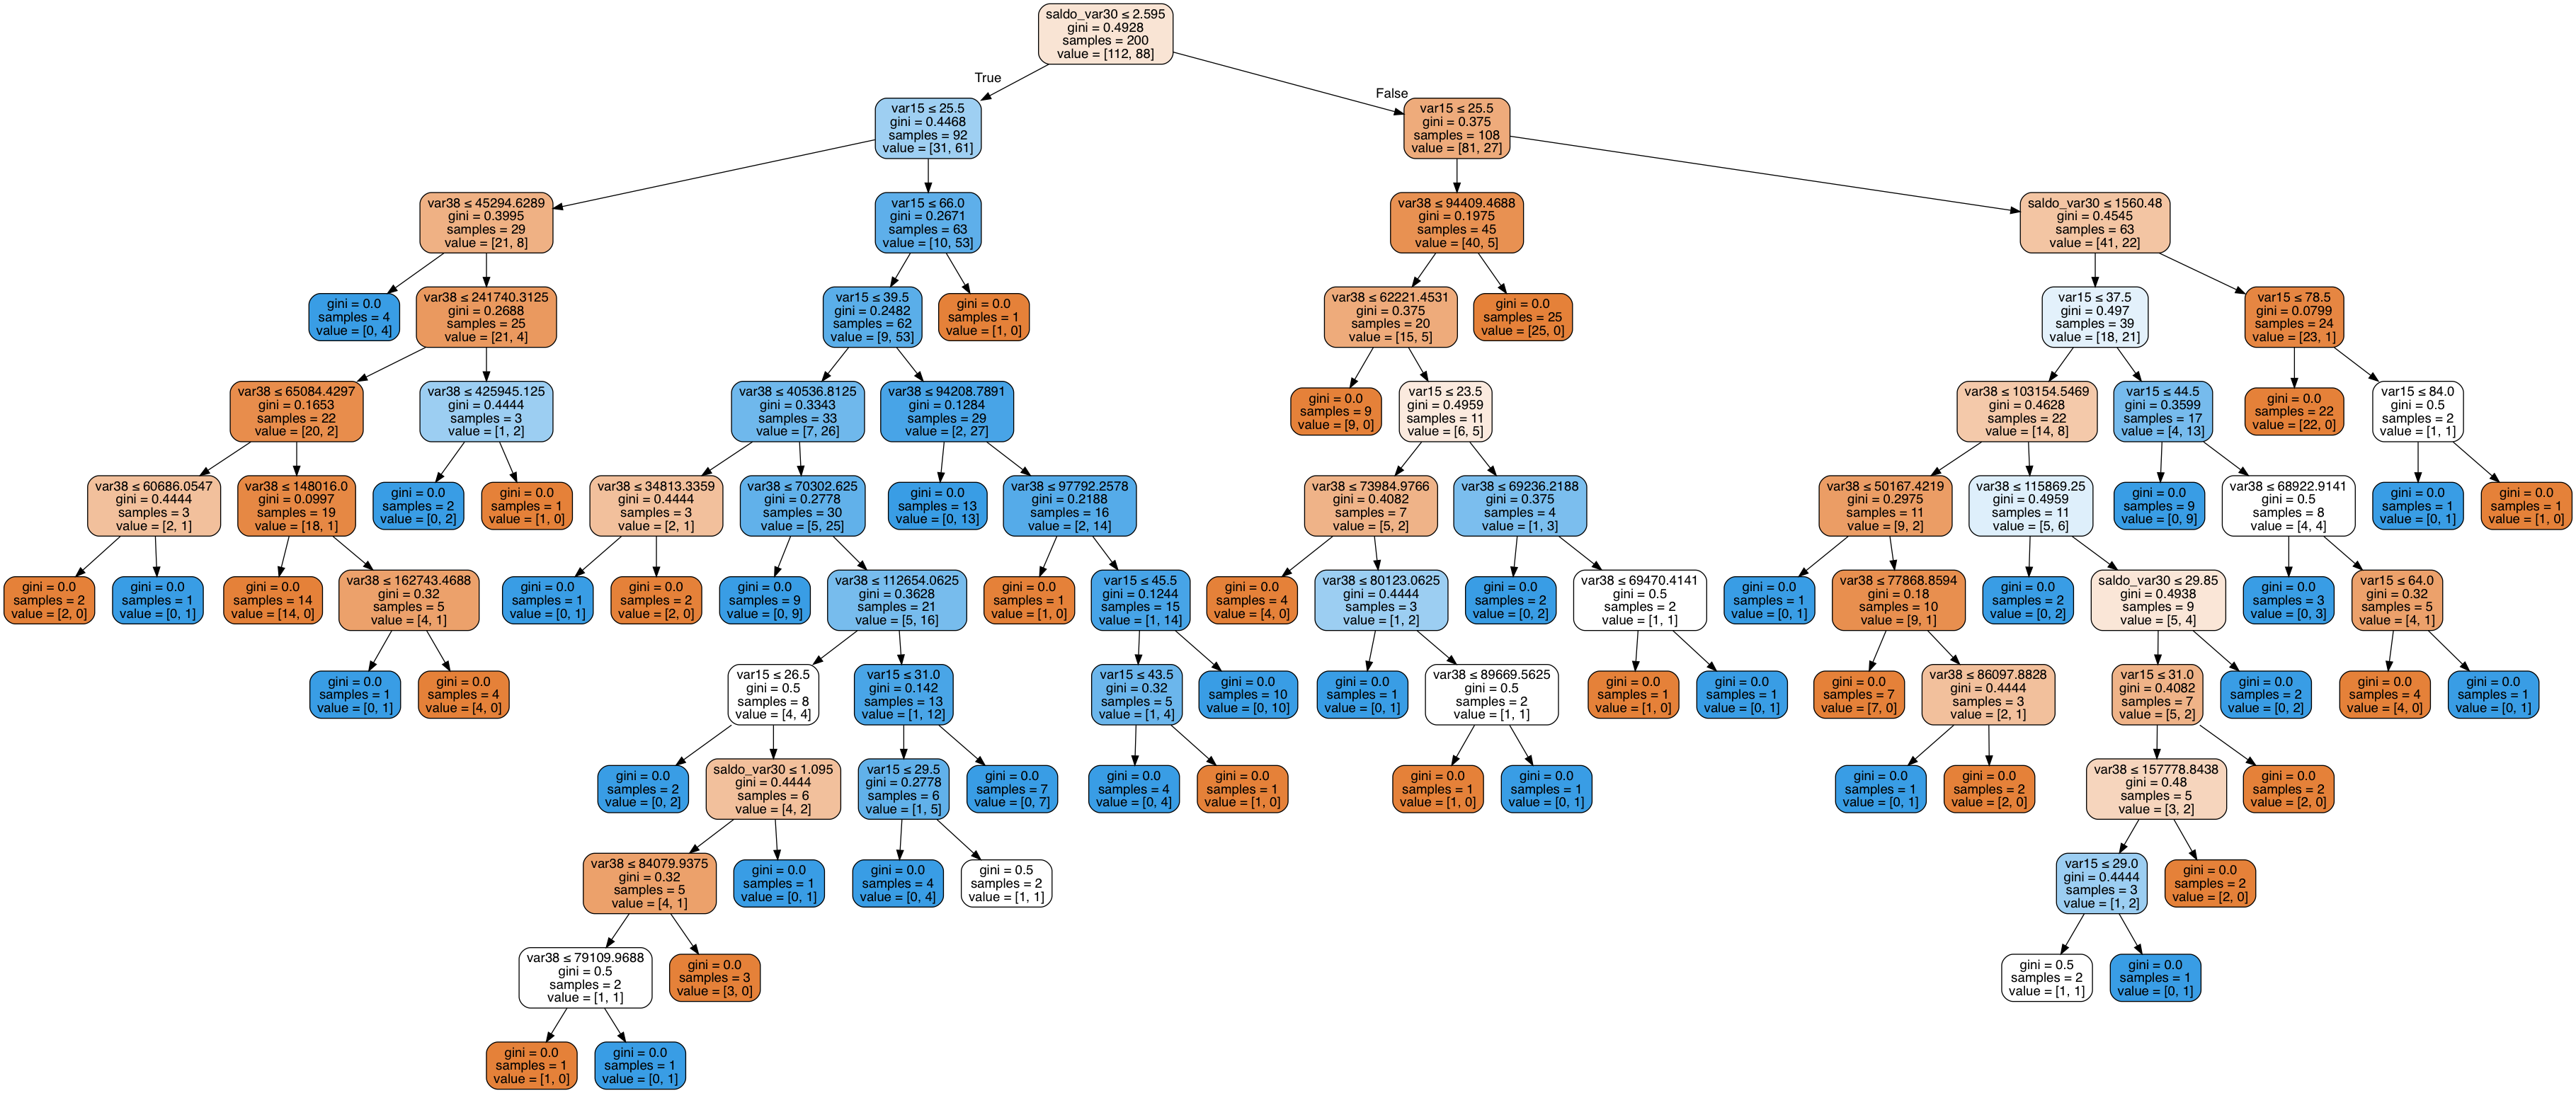

In [75]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
 